In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [ ]:
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_systematics"#_QL_L180/"
analyzer = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)

## Copy data from source directory to analysis directory

In [ ]:
analyzer.copy_data_from_directory(source_data_filepath)

# Systematics plots

In [4]:
df = analyzer.get_data()
sns.set_palette("magma", n_colors=len(df["length"].unique()))

In [10]:
all_params = analyzer.all_params()
all_params

,freq,nMC,ntherm,itheta,beta,length,itheta/pi
0,1,10000,0,1.178097,1.6,180,0.375
0,1,10000,0,1.963495,1.6,180,0.625
0,1,10000,0,3.141593,1.6,180,1.000
0,1,10000,0,0.000000,1.6,180,0.000
0,1,10000,0,1.570796,1.6,180,0.500
0,1,10000,0,2.356194,1.6,180,0.750
0,1,10000,0,2.748894,1.6,180,0.875
0,1,10000,0,0.392699,1.6,10,0.125
0,1,10000,0,0.000000,1.6,10,0.000
0,1,10000,0,0.785398,1.6,10,0.250


In [5]:
itheta = 0.5*np.pi
beta = 1.6
length = 10
nMC = 10000
ntherm = 0
plot_params = {"beta": beta, "nMC": nMC}#,"itheta": itheta, "length": length, "ntherm": ntherm}
df_systematics = analyzer.get_data(**plot_params)

In [6]:
df_systematics.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,203.0,-31701.860263,-31941.014004,-0.003313,0.004017,-0.000656,0.659568,8.0,...,490,755,755,1,0.629697,4.491934,0.127075,0.036342,0.030606,-0.218331
1,1,32400.0,231.0,-40504.294619,-40776.435083,-0.004435,0.004017,-0.000656,0.583642,16.0,...,490,755,755,1,0.728564,5.197200,0.127075,0.036342,0.026453,-0.188703
2,2,32400.0,240.0,-46005.836939,-46288.580278,-0.004663,0.004017,-0.000656,0.537346,24.0,...,490,755,755,1,0.747056,5.329118,0.127075,0.036342,0.025798,-0.184032
3,3,32400.0,207.0,-49547.906429,-49791.772559,-0.005438,0.004017,-0.000656,0.503372,31.0,...,490,755,755,1,0.806752,5.754959,0.127075,0.036342,0.023889,-0.170414
4,4,32400.0,200.0,-51880.687218,-52116.306667,-0.006818,0.004017,-0.000656,0.477611,39.0,...,490,755,755,1,0.903336,6.443934,0.127075,0.036342,0.021335,-0.152194


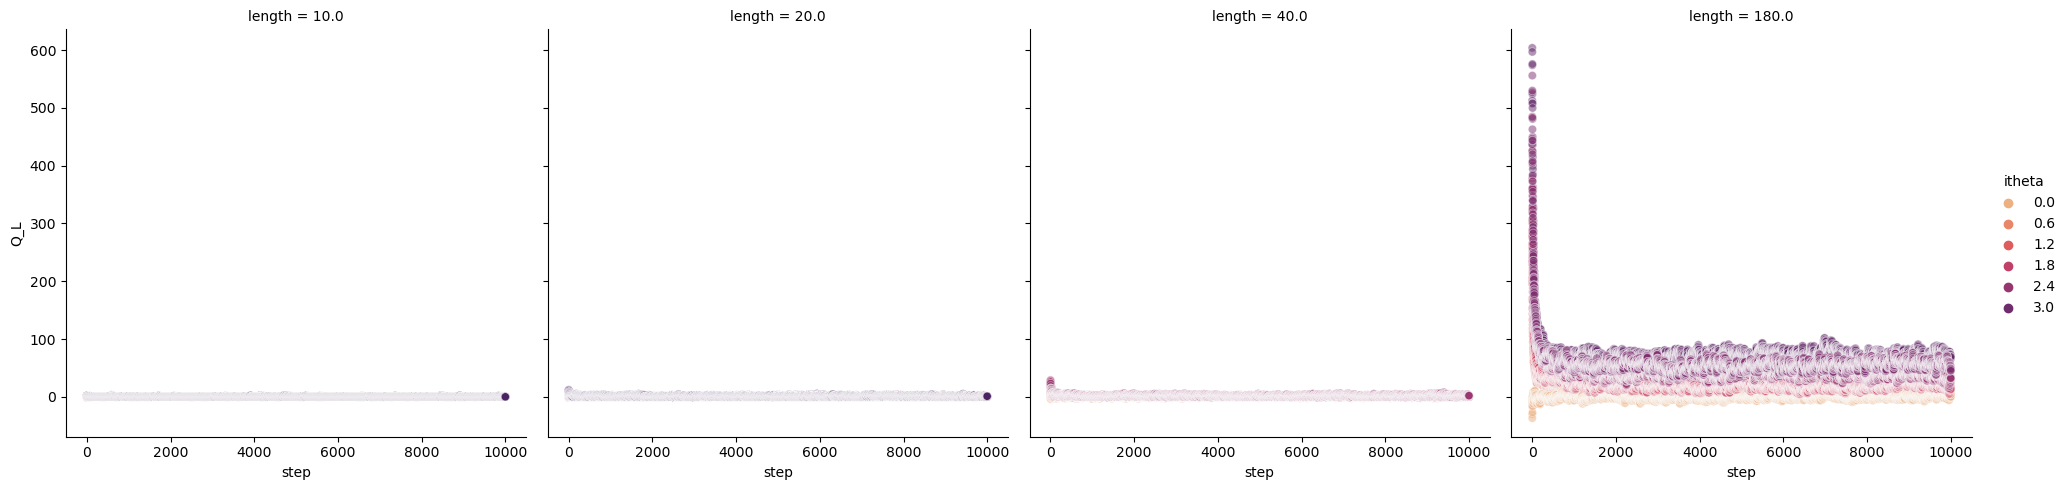

In [7]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "itheta",col = "length",
            alpha = 0.5,palette = "flare" )
plt.show()

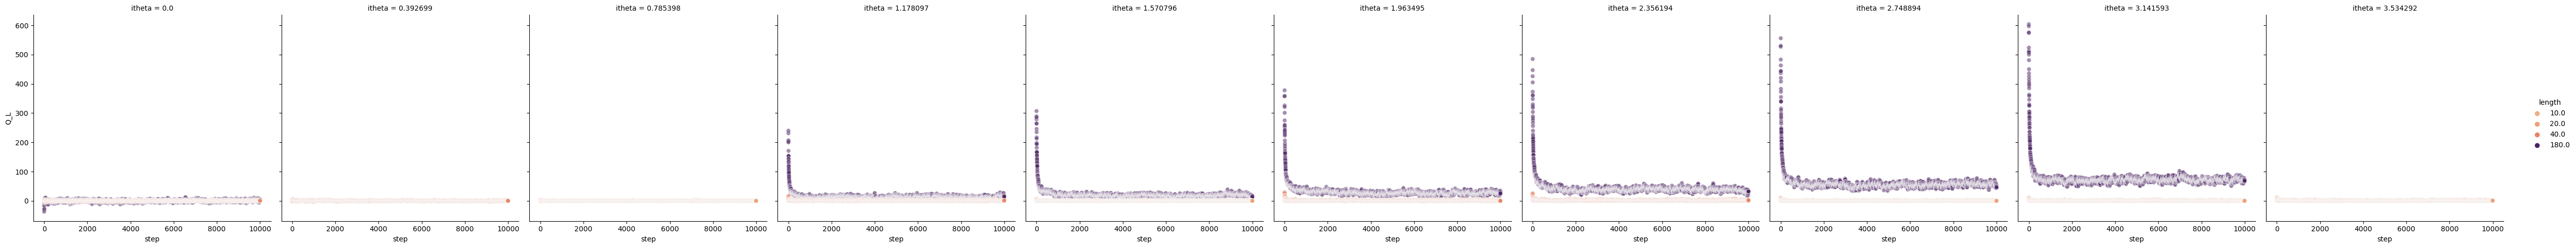

In [8]:
sns.relplot(data = df_systematics, x = "step", y = "Q_L", hue = "length",col = "itheta",
            alpha = 0.5,palette = "flare" )
plt.show()

In [9]:
itheta = 1.*np.pi
beta = 1.6
length = 180
nMC = 10000
ntherm = 0
freq = 1
acf_params = {"beta": beta, "nMC": nMC,"itheta": itheta, "length": length, "ntherm": ntherm, "freq": freq}

In [10]:
run = analyzer.get_data(single_run = True,suppress_output = False,**acf_params)

freq 1
nMC 10000
ntherm 0
itheta 3.141593
beta 1.6
length 180


In [11]:
run.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,513.0,-30895.432839,-32507.069871,-0.001602,0.001812,0.005203,0.651049,7.0,...,515,625,624,1,6.528724,2.762594,-0.018217,0.01878,0.129909,-0.054970
1,1,32400.0,604.0,-39937.178449,-41834.700412,0.001061,0.001812,0.005203,0.578966,14.0,...,515,625,624,1,2.248244,-5.313183,-0.018217,0.01878,0.067546,0.159629
2,2,32400.0,597.0,-44966.338543,-46841.869357,-0.000067,0.001812,0.005203,0.531615,21.0,...,515,625,624,1,1.335164,0.564967,-0.018217,0.01878,0.635233,-0.268795
3,3,32400.0,574.0,-48326.978626,-50130.252809,-0.001366,0.001812,0.005203,0.498380,28.0,...,515,625,624,1,6.028683,2.551004,-0.018217,0.01878,0.140684,-0.059530
4,4,32400.0,576.0,-50744.163534,-52553.720902,-0.002892,0.001812,0.005203,0.473796,35.0,...,515,625,624,1,8.771952,3.711803,-0.018217,0.01878,0.096688,-0.040913


In [12]:
decorr = analyzer.ta(run["Q_L"])

In [13]:
run = analyzer.autocorrelation(run)

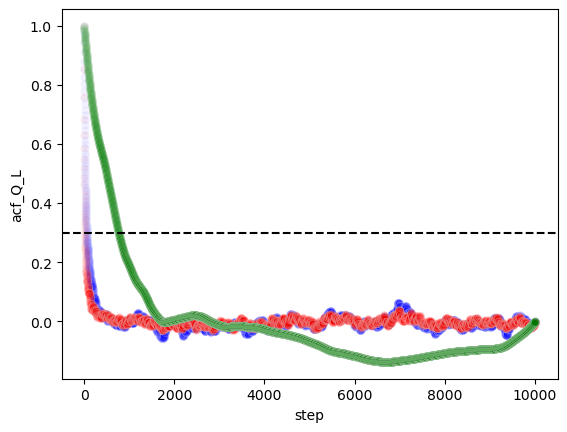

In [14]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red", alpha = 0.05)
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green", alpha = 0.05)
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

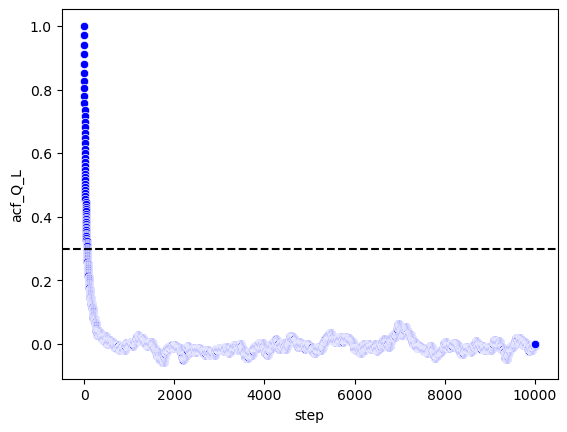

In [15]:
sns.scatterplot(data = run, x = "step", y = "acf_Q_L", color = "blue")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

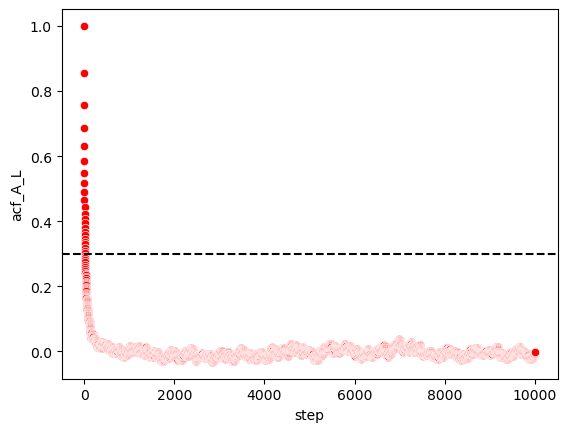

In [16]:
sns.scatterplot(data = run, x = "step", y = "acf_A_L", color = "red")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

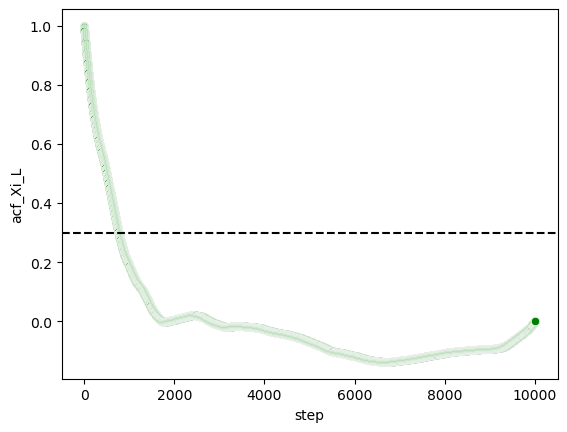

In [17]:
sns.scatterplot(data = run, x = "step", y = "acf_Xi_L", color = "green")
plt.axhline(y = 0.3, color = "black", linestyle = "--")
plt.show()

In [18]:
df_ta = analyzer.do_stats(therm = 0.0, **plot_params)
df_ta = df_ta[['Q_L_ta', 'A_L_ta', 'S_L_ta', 'Xi_L_ta']]
df_ta = df_ta.rename(columns = {'Q_L_ta':"Q_L", 'A_L_ta':"A_L", 'S_L_ta':"S_L", 'Xi_L_ta':"Xi_L"})
df_ta.columns.name = "observable"
df_ta = df_ta.stack()
df_ta.name = "ta"
df_ta = df_ta.to_frame()

In [19]:
# df_ta.head()

In [20]:
# sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "observable", col = "length", row = "nMC",
#            palette = analyzer.palette)
# plt.show()

In [21]:
# sns.relplot(data = df_ta, x = "itheta", y = "ta", hue = "length", col = "observable", row = "nMC",
#            palette = analyzer.palette)
# plt.show()

ValueError: Could not interpret value `itheta` for parameter `x`

# Timing

Note, not all output files have timing info, so we will need to deal with nans.

In [ ]:
df_dt = analyzer.get_data()

In [ ]:
df_dt = df_dt.dropna(subset = ['dt'])

In [ ]:
df_dt.head()

In [ ]:
sns.relplot(data = df_dt, x = "step", y = "dt", hue = "length",col = "itheta",
            alpha = 0.05,palette = "flare" )
plt.show()

In [ ]:
df_time = analyzer.do_stats()

In [ ]:
df_time.head()

In [ ]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)", hue = "itheta")
#plt.yscale('log')
plt.show()